# Stabla odlučivanja


Stablo odluke je kao igra „20 pitanja”.     
Počinjete s jednim velikim pitanjem na vrhu (koren), a kako odgovarate sa „da” ili „ne”, pratite grane stabla ka konkretnijim pitanjima (čvorovima). Svaki put kada odgovorite na pitanje, spuštate se do sledećeg. To traje sve dok ne stignete do kraja puta (lišća), gde dobijate svoju konačnu odluku ili odgovor.

---

## Primer:

![img/decision_tree.png](img/decision_tree.png)

Zamislite da odlučujete da li da izađete napolje.    
1. Vaše prvo pitanje može biti: „Da li pada kiša?”
- Ako je odgovor „da”, odlučujete da ostanete unutra.
- Ako je „ne”, sledeće pitanje može biti:
2. „Da li je hladno?” i tako dalje...

Svako pitanje pomaže da donesete konačnu odluku. Tako radi stablo odluke – postavlja pitanja o vašim podacima dok ne donese predikciju.

---
## Mehanizam obučavanja

Klasifikator **Decision Tree** radi tako što rekurzivno deli podatke na osnovu **najinformativnijih osobina (features)** :

1. Počinje sa celim skupom podataka u **koren čvoru**.
2. Bira najbolju osobinu za podelu podataka (na osnovu mera kao što je **Gini impurity**).
3. Kreira **dečije čvorove** za svaku moguću vrednost izabrane osobine.
4. Ponavlja korake 2–3 za svaki dečiji čvor dok se ne ispuni **kriterijum za zaustavljanje** (npr. dostignuta maksimalna dubina, minimalan broj uzoraka po listu ili potpuno čisti listovi).
5. Svakom listu dodeljuje **većinsku klasu** među uzorcima koji se nalaze u tom čvoru.

---
## Hiperparametri

Da bi stablo odluke odredilo koja pitanja da postavi i kojim redosledom, koristi matematičke mere kao što su entropija (bolja za višeklasne probleme), Gini impurity(brža i jednostavnija)... Ovi proračuni pomažu algoritmu da pronađe najinformativnije podele podataka – odnosno, da se podaci razdvoje na način koji maksimizira preciznost predikcija.

1. Maksimalna dubina
  - Preporuka: Počnite sa manjim dubinama (3-5), postepeno povećavajte
2. Minimalan broj uzoraka koji čvor mora imati da bi mogao biti podeljen
  - Preporuka: Počnite sa većim vrednostima, oko 5–10% vaših trening podataka
3. Minimalan broj uzoraka koji mora biti u listu (leaf čvoru)
  - Preporuka: Izaberite vrednosti tako da skup primera u listu ima neko značenje (otprilike 1-5% trening skupa)
---

## Prednosi:

- Jednostavnost interpretacije
- Svestranost: Mogu da rade i sa kategorijskim (npr. boja, tip) i sa numeričkim podacima (npr. cena, temperatura)
- Bez puno pripreme podataka: Ne traže puno predobrada podataka. Nisu toliko osetljiva na ekstremne vrednosti (outliers) i nedostajuće podatke.
- Automatski biraju najvažnije osobine

## Mane:
- Prenaučenost (overfitting): Ovo se ublažava tehnikama kao što su pruning ("šišanje grana"), ograničavanje maksimalne dubine stabla ili podešavanje minimalnog broja uzoraka po listu.
- Nebalansiran skup podataka
- Nestabilnost: Mala promena u podacima može dovesti do sasvim drugačijeg stabla. Ovaj problem se ublažava metodama ansambla, poput Random Forest-a ili XGBoost-a.
- Teškoće sa složenim odnosima: Stabla dobro rade za hijerarhijske odluke, ali se muče kad osobine međusobno složeno deluju ili kada je granica odluke vrlo komplikovana za jednostavna cepanja.


Import biblioteka:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Učitavanje skupa podataka:

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Obučavanje:

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Evaluacija:

In [ ]:
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 1.0


Prikaz stabla odlučivanja:

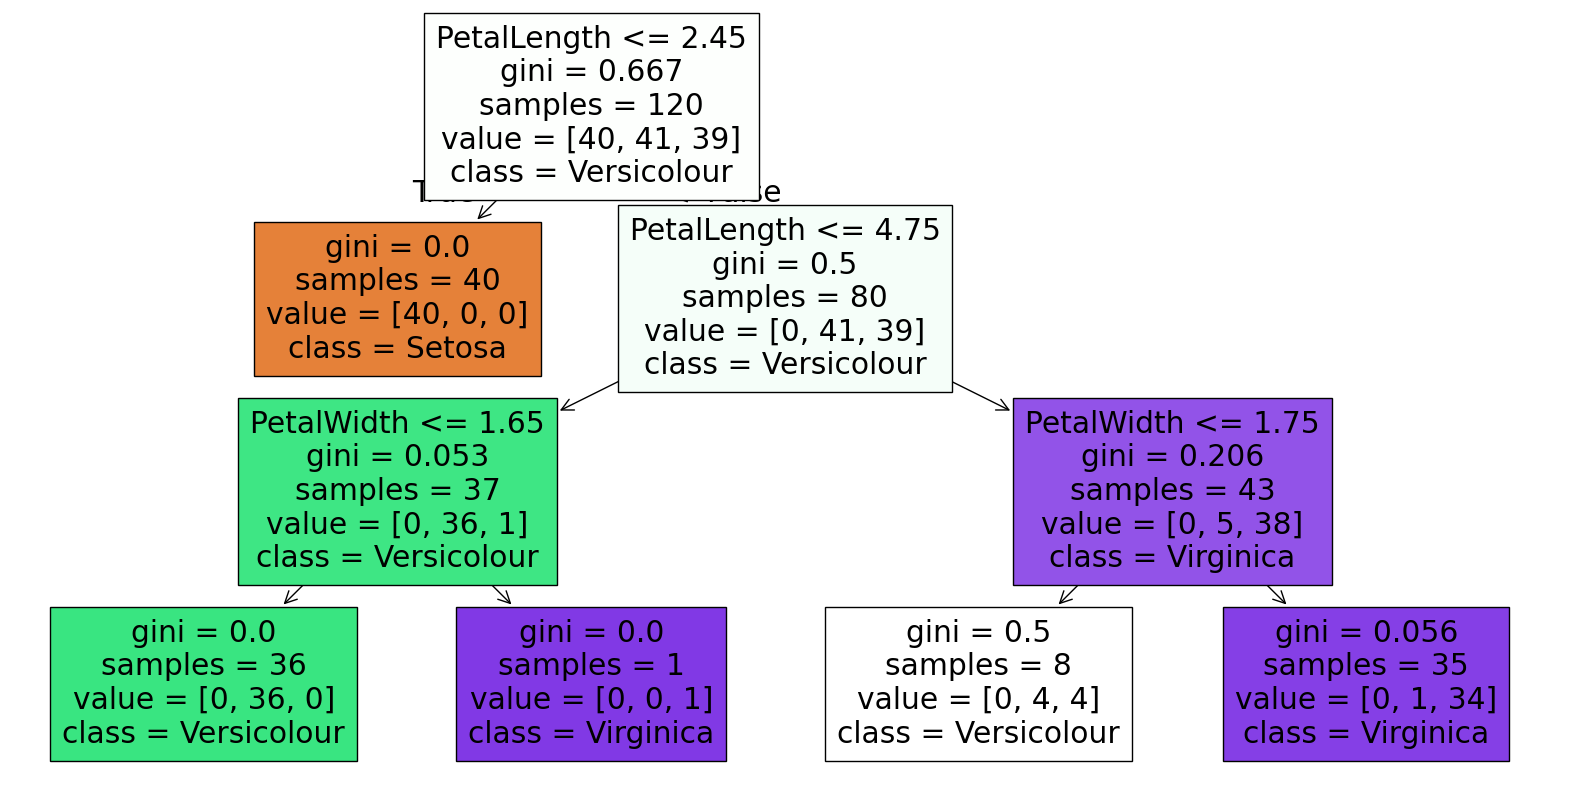

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], class_names=['Setosa', 'Versicolour', 'Virginica'])
plt.show()

# Random Forest

Zamislite da treba da donesete tešku odluku i pitate nekoliko svojih prijatelja za mišljenje. Svaki prijatelj daje savet zasnovan na svom razumevanju situacije. Na kraju, vi donosite odluku uzimajući u obzir sve savete svojih prijatelja.

Upravo tako funkcioniše algoritam Random Forest.

---
## Random Forest = tim stabala odluke

![img/rf.png](img/rf.png)
  
U Random Forest-u, umesto jednog stabla odluke, koristi se cela **šuma** stabala. Svako stablo u šumi trenira se na slučajnom uzorku podataka (bootstrap uzorkovanje) i pri pravljenju podela uzima u obzir samo slučajni podskup osobina (feature randomization). Konačna odluka se donosi većinskim glasom svih stabala.

---
## Mehanizam obučavanja

1. Bootstrap uzorkovanje: Svako stablo dobija svoj jedinstveni trening skup, kreiran slučajnim uzorkovanjem iz originalnih podataka sa ponavljanjem. (Neki podaci mogu biti uključeni više puta, dok neki možda neće biti korišćeni -> out-of-bag (OOB) podaci)
2. Slučajni izbor osobina: Pri pravljenju podele, svako stablo u svakom splitu uzima u obzir samo slučajni podskup osobina (za klasifikaciju - obično kvadratni koren od ukupnog broja osobina).
3. Rast stabala: Svako stablo raste koristeći samo svoj bootstrap uzorak i odabrane osobine, praveći podele sve dok ne dostigne kriterijum za zaustavljanje (npr. čiste grupe ili minimalni broj uzoraka).
4. Konačna predikcija: Sva stabla zajedno donose konačnu odluku.
- Za klasifikaciju → većinsko glasanje po klasama
- Za regresiju → prosek predikovanih vrednosti svih stabala

---
## Hiperparametri

1. Maksimalna dubina
2. Minimalan broj podataka za deljenje (pre deljenja)
3. Minimalan broj podataka koji mora biti u listu (posle deljenja)
4. Broj stabala
5. Broj procesorski jezgara
6. Bootstrap - da li će stabla dobijati nasumičan skup ili ceo trening skup
7. OOB score - da li će računati performanse na oob skupovima ili ne

---

## Prednosti:
1. Otpornost na pretreniranje (overfitting)
2. Rukovanje velikim skupovima podataka i mnogo osobina
3. Paralelizacija
4. Važnost osobina (feature importance)
5. Minimalna priprema podataka: Dobro radi i sa numeričkim i sa kategorijskim promenljivama bez velike pripreme. Dobro se nosi sa nedostajućim vrednostima i ekstremima (outlier-ima) i automatski može da pronađe složene veze u podacima.

## Mane:
1. Složenost:
2. Manja interpretabilnost:
3. Duže vreme predikcije:



Import biblioteka:

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

Učitavanje skupa podataka:

In [3]:
california = fetch_california_housing()
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Obučavanje:

In [5]:
regr = RandomForestRegressor(n_estimators=100, random_state=42)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Evaluacija:

In [6]:
y_pred = regr.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

RMSE: 0.5053399773665033


Prikaz bitnosti osobina:

In [7]:
regr.feature_importances_

array([0.52487148, 0.05459322, 0.04427185, 0.02960631, 0.03064978,
       0.13844281, 0.08893574, 0.08862881])

# XGBoost

Zamislite da treba da donesete tešku odluku. Ovog puta, umesto da svi prijatelji daju mišljenje odjednom, svaki prijatelj ima svoj red: prvi daje svoj savet, drugi pokušava da ispravi greške prvog, treći ispravlja greške prva dva... Svaki novi savet se fokusira na ono što prethodni nisu dobro predvideli.

Na kraju, kada svi prijatelji daju svoje doprinose, uzimate zbir svih njihovih saveta i donosite konačnu odluku.

Upravo tako funkcioniše XGBoost — svaki novi model u ansamblu se fokusira na greške prethodnih, a konačna predikcija je zbir doprinosa svih modela.

---
## eXtreme Gradient Boosting


![img/xgb.png](img/xgb.png)
  

Umesto da izgradi sva stabla odjednom (kao Random Forest), gradi stabla jedno za drugim. Svako novo stablo ispravlja greške prethodnih. To „popravljanje grešaka korak po korak” je njegova ključna prednost.

---
## Hiperparametri
1. Maksimalna dubina stabla
2. Broj stabala
3. Stopa učenja
4. subsample - Udeo trening skupa koji se koristi za obučavanje

---
## Prednosti
1. Performanse
2. Brzina
3. Svestranost
4. Otpornost

## Mane
1. Zahtijeva pažljivo podešavanje
2. Podložan pretreniravanju ako nije pravilno podešen: Iako XGBoost ima parametre regularizacije, može i dalje biti sklon overfitting-u ako se parametri ne podešavaju pažljivo
3. Manja interpretabilnost

Import biblioteka:

In [38]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Učitavanje podataka:

In [16]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

y = [1 if target > 140 else 0 for target in y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)


Obučavanje:

In [35]:
param = {
    'eta': 0.3,
    'max_depth': 3,
    'objective': 'binary:logistic'  # za binarnu klasifikaciju
}
num_boost_round  = 15

model = xgb.train(param, D_train, num_boost_round=num_boost_round )

Evaluacija:

In [36]:
preds = model.predict(D_test)
best_preds = [1 if p > 0.5 else 0 for p in preds]

print(f"Accuracy: {accuracy_score(y_test, best_preds)}")

Accuracy: 0.7528089887640449


Viši nivo apstrikacije XGBoost-a:

In [40]:
model2 = XGBClassifier(n_estimators=15, max_depth=3, learning_rate=0.3)
model2.fit(X_train, y_train)
preds2 = model2.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds2)}")

Accuracy: 0.7528089887640449
